In [1]:
# Importing Packages
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import jsonlines
import warnings
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

The 2 main json files that I will be importing and analyzing for my Capstone Project are the `yelp_academic_dataset_business.json` and `yelp_academic_dataset_review.json` files.

In [2]:
data_path = "../../../yelp_dataset/"

### Business File

In [3]:
# Importing Yelp Business JSON File

# Create an empty list to store the JSON data
business_list = []

# Read the JSON file using jsonlines
with jsonlines.open(data_path + "yelp_academic_dataset_business.json") as reader:
    for obj in reader:
        business_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
business_df = pd.DataFrame(business_list)        

# Length of rows of Data
print(business_df.shape)

# Display the first few rows of the DataFrame
business_df.head()

(150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
# Drop the columns that are not required
business_df = business_df.drop(['attributes', 'hours'], axis=1)

# Filtering only for businesses that are still open, open = 1, closed = 0
business_df = business_df[business_df['is_open']==1]

### Deciding which City to Focus on

In [5]:
# Top Cities that have the most number of Businesses in this dataset
top_cities = business_df['city'].value_counts().head(10)
top_cities

city
Philadelphia     10542
Tucson            7533
Tampa             7219
Indianapolis      5894
Nashville         5398
Reno              4762
New Orleans       4649
Edmonton          3916
Saint Louis       3403
Santa Barbara     3020
Name: count, dtype: int64

Philadelphia has the most number of Businesses in this dataset

In [6]:
# Filtering Philadelphia
business_df = business_df[business_df.city.isin(['Philadelphia'])]

business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Restaurants, Japanese"
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"Korean, Restaurants"
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"Eatertainment, Arts & Entertainment, Brewpubs,..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"Restaurants, Automotive, Delis, Gas Stations, ..."


### Review File

In [7]:
# Importing Yelp Review JSON File

# Create an empty list to store the JSON data
reviews_list = []

# Read the JSON file using jsonlines
with jsonlines.open(data_path + "yelp_academic_dataset_review.json") as reader:
    for obj in reader:
        reviews_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
reviews_df = pd.DataFrame(reviews_list)        

# Length of rows of Data
print(reviews_df.shape)

# Display the first few rows of the DataFrame
reviews_df.head()

(6990280, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [8]:
# Drop the columns that are not required
reviews_df = reviews_df.drop(['useful','funny','cool'], axis=1)

print(reviews_df.shape)

(6990280, 6)


### Filter reviews from businesses in Philly

In [9]:
# Keeping only the reviews for the businesses in Philadelphia
philly_reviews_df = reviews_df.merge(business_df[['business_id']], on='business_id', how='inner')
print(philly_reviews_df.shape)

(744111, 6)


In [10]:
# Splitting Date Column into Year, Month and Time Columns
def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

philly_reviews_df['year'] = philly_reviews_df.date.apply(create_yr)
philly_reviews_df['month'] = philly_reviews_df.date.apply(create_mth)
philly_reviews_df['time'] = philly_reviews_df.date.apply(create_time)

In [11]:
# Number of Unique Users in this Reviews Dataset
n_users = len(philly_reviews_df.user_id.unique())
n_users

245883

In [12]:
# Get the maximum value of the "date" column
max_date = philly_reviews_df['date'].max()

# Display the maximum date
print(max_date)

2022-01-19 19:46:34


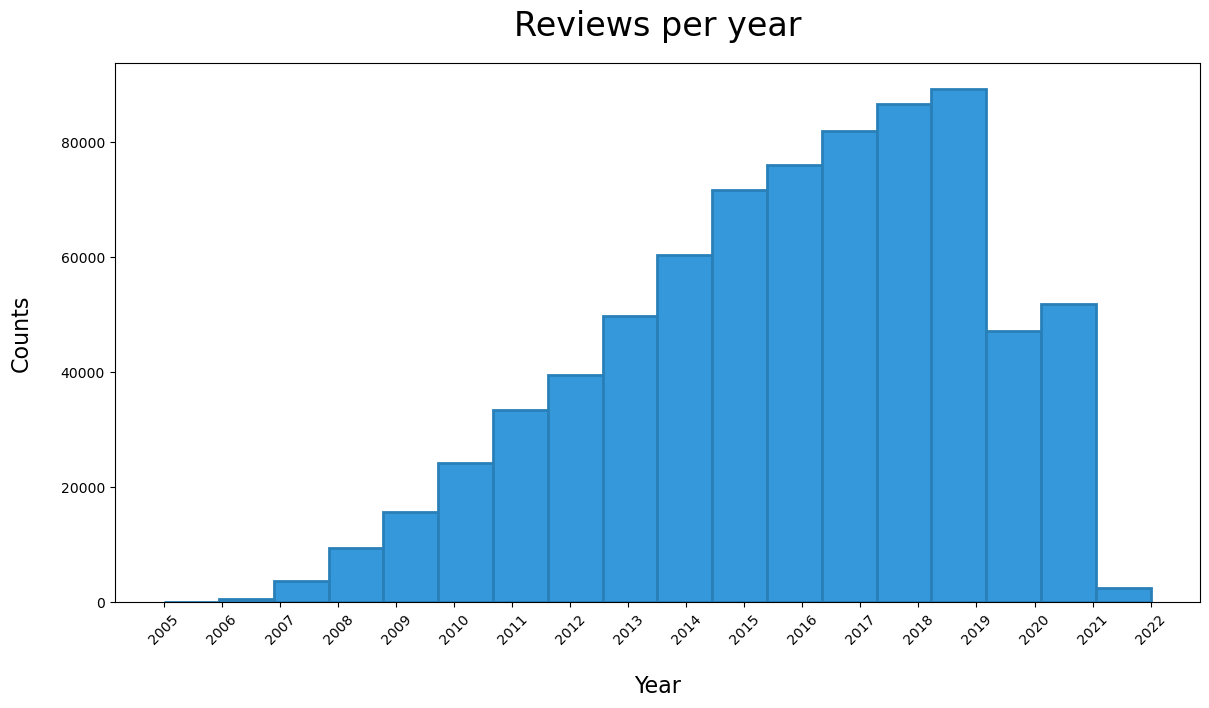

In [13]:
# Histogram plot of Business Reviews per Year
reviews_sorted = philly_reviews_df.sort_values(by='year', ascending=True)

def make_histogram(dataset, attribute, bins=18, bar_color='#3498db', edge_color='#2980b9', title='Title', x='X', y='Y', sort_index=False):
    fig, ax = plt.subplots(figsize=(15, 15/1.6180))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(x, fontsize=16, labelpad=20)
    ax.set_ylabel(y, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(reviews_sorted, 'year', title='Reviews per year', x='Year', y='Counts')

The histogram has a left-skewed distribution with a drop in reviews in 2020 (due to COVID-19). I will only be analyzing reviews from **2015 to 2021** for the sake of this capstone project.

In [14]:
# Filtering for Reviews from 2015-2021
philly_reviews_df = philly_reviews_df[(philly_reviews_df['year'].astype(int) >= 2015) & (philly_reviews_df['year'].astype(int) <= 2021)]

# Overview of our Final Reviews Dataset
print(philly_reviews_df.shape)


(504702, 9)


### We are now left with 504,702 rows of Yelp User Reviews Data for our 10,542 Businesses in Philadelphia.

In [15]:
# Checking for Null Values
philly_reviews_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
text           0
date           0
year           0
month          0
time           0
dtype: int64

In [16]:
# Save cleaned business dataframe into csv file
business_df.to_csv(data_path + "business_dataset.csv")

# Save cleaned reviews dataframe into csv file
philly_reviews_df.to_csv(data_path + "reviews_dataset.csv")